<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Identifying and Managing West Nile Virus Hotspots
### Part4: Cost Benefit Analysis

This section will focus on the cost benefit analysis. After which, we will provide a conclusion and recommendation for spraying in Chicago.


In [1]:
# Importing the required libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Importing the required datasets
merged_train = pd.read_csv('../data/merged_train.csv')
spray = pd.read_csv('../data/spray_cleaned.csv')

In [3]:
merged_train

date                 species   latitude  longitude  trap  \
0     2007-05-29  CULEX PIPIENS/RESTUANS  41.867108 -87.654224  T048   
1     2009-09-25           CULEX PIPIENS  41.776156 -87.778927  T155   
2     2009-09-25          CULEX RESTUANS  41.923738 -87.785288  T013   
3     2009-09-25          CULEX RESTUANS  41.960616 -87.777189  T017   
4     2007-08-24          CULEX RESTUANS  41.662014 -87.724608  T135   
...          ...                     ...        ...        ...   ...   
8470  2007-09-05           CULEX PIPIENS  41.673408 -87.599862  T115   
8471  2007-08-08           CULEX PIPIENS  41.726465 -87.585413  T138   
8472  2007-08-28           CULEX PIPIENS  41.673408 -87.599862  T115   
8473  2007-07-25           CULEX PIPIENS  41.673408 -87.599862  T115   
8474  2007-08-16           CULEX PIPIENS  41.673408 -87.599862  T115   

      nummosquitos  wnvpresent  wnvcount  station  tmax  ...  mifg  ra  sn  \
0              1.0         0.0       0.0        2    88  ...   0.0   0   0   
1              1.0         0.0       0.0        2    70  ...   0.0   1   0   
2              1.0         1.0       1.0        2    70  ...   0.0   1   0   
3              1.0         0.0       0.0        1    70  ...   0.0   1   0   
4              1.0         0.0       0.0        2    81  ...   0.0   1   0   
...            ...         ...       ...      ...   ...  ...   ...  ..  ..   
8470        1648.0         1.0       3.0        2    91  ...   0.0   0   0   
8471        1658.0         1.0       2.0        2    87  ...   0.0   1   0   
8472        2207.0         1.0       2.0        2    90  ...   0.0   0   0   
8473        2356.0         1.0       3.0        2    83  ...   0.0   0   0   
8474        2532.0         1.0      10.0        2    77  ...   0.0   0   0   

      sq  ts  tsra vcts   gr  vcfg  sprayed  
0      0   0     0    0  0.0   0.0        0  
1      0   0     0    0  0.0   0.0        0  
2      0   0     0    0  0.0   0.0        0  
3      0   0     0    0  0.0   0.0        0  
4      0   1     1    0  0.0   0.0        0  
...   ..  ..   ...  ...  ...   ...      ...  
8470   0   0     0    0  0.0   0.0        0  
8471   0   0     1    0  0.0   0.0        0  
8472   0   0     0    0  0.0   0.0        0  
8473   0   0     0    0  0.0   0.0        0  
8474   0   0     0    0  0.0   0.0        0  

[8475 rows x 43 columns]

In [4]:
# Converting date to datetime values
merged_train['date'] = pd.to_datetime(merged_train['date'])

# Adding month and year column
merged_train['month'] = merged_train.loc[:,'date'].dt.month
merged_train['year'] = merged_train.loc[:,'date'].dt.year

In [5]:
# Converting date to datetime values
spray['date'] = pd.to_datetime(spray['date'])

# Adding year column
spray['year'] = spray.loc[:,'date'].dt.year

In [6]:
# 2011-08-29 spray data is dropped as previous analysis showed that the spray location is away from the all the provided trap data.
spray = spray.loc[spray['date'] > '2011-08-29']

# Separating spray data based on years
spray_2011 = spray.loc[spray['year'] == 2011]
spray_2013 = spray.loc[spray['year'] == 2013]

## Cost Benefit Analysis

### Spraying in Chicago

For the city of Chicago, to control adult mosquito population, they will be spraying a form of insecticide called Zenivex E4. Zenivex E4 is an insecticide which is fast-decomposing and harmless to humans. It will be sprayed on a truck mounted fogger in a proccess known as Ultra Low Volume fogging. The active ingredient in Zenivex has a half-life of 1.5 days in water and 4.4 days in soil. Each spray sessions will typically last from dusk to 1 a.m. and will use approximately 1.5 fluid ounces per acre. [Source](https://www.chicago.gov/content/dam/city/depts/cdph/Mosquito-Borne-Diseases/Zenivex.pdf)

In Chicago, during 2011, there are 8 human infections of the west nile virus. While in 2013, there are 37 human infections. [Source](https://www.chicago.gov/content/dam/city/depts/cdph/food_env/general/West_Nile_Virus/WNV_2018databrief_FINALJan102019.pdf)

Currently, spraying is only performed around traps which had mosquitos with west nile virus present in 2 consequtive weeks. [Source](https://www.chicago.gov/content/dam/city/depts/cdph/food_env/general/West_Nile_Virus/WNV_2018databrief_FINALJan102019.pdf)



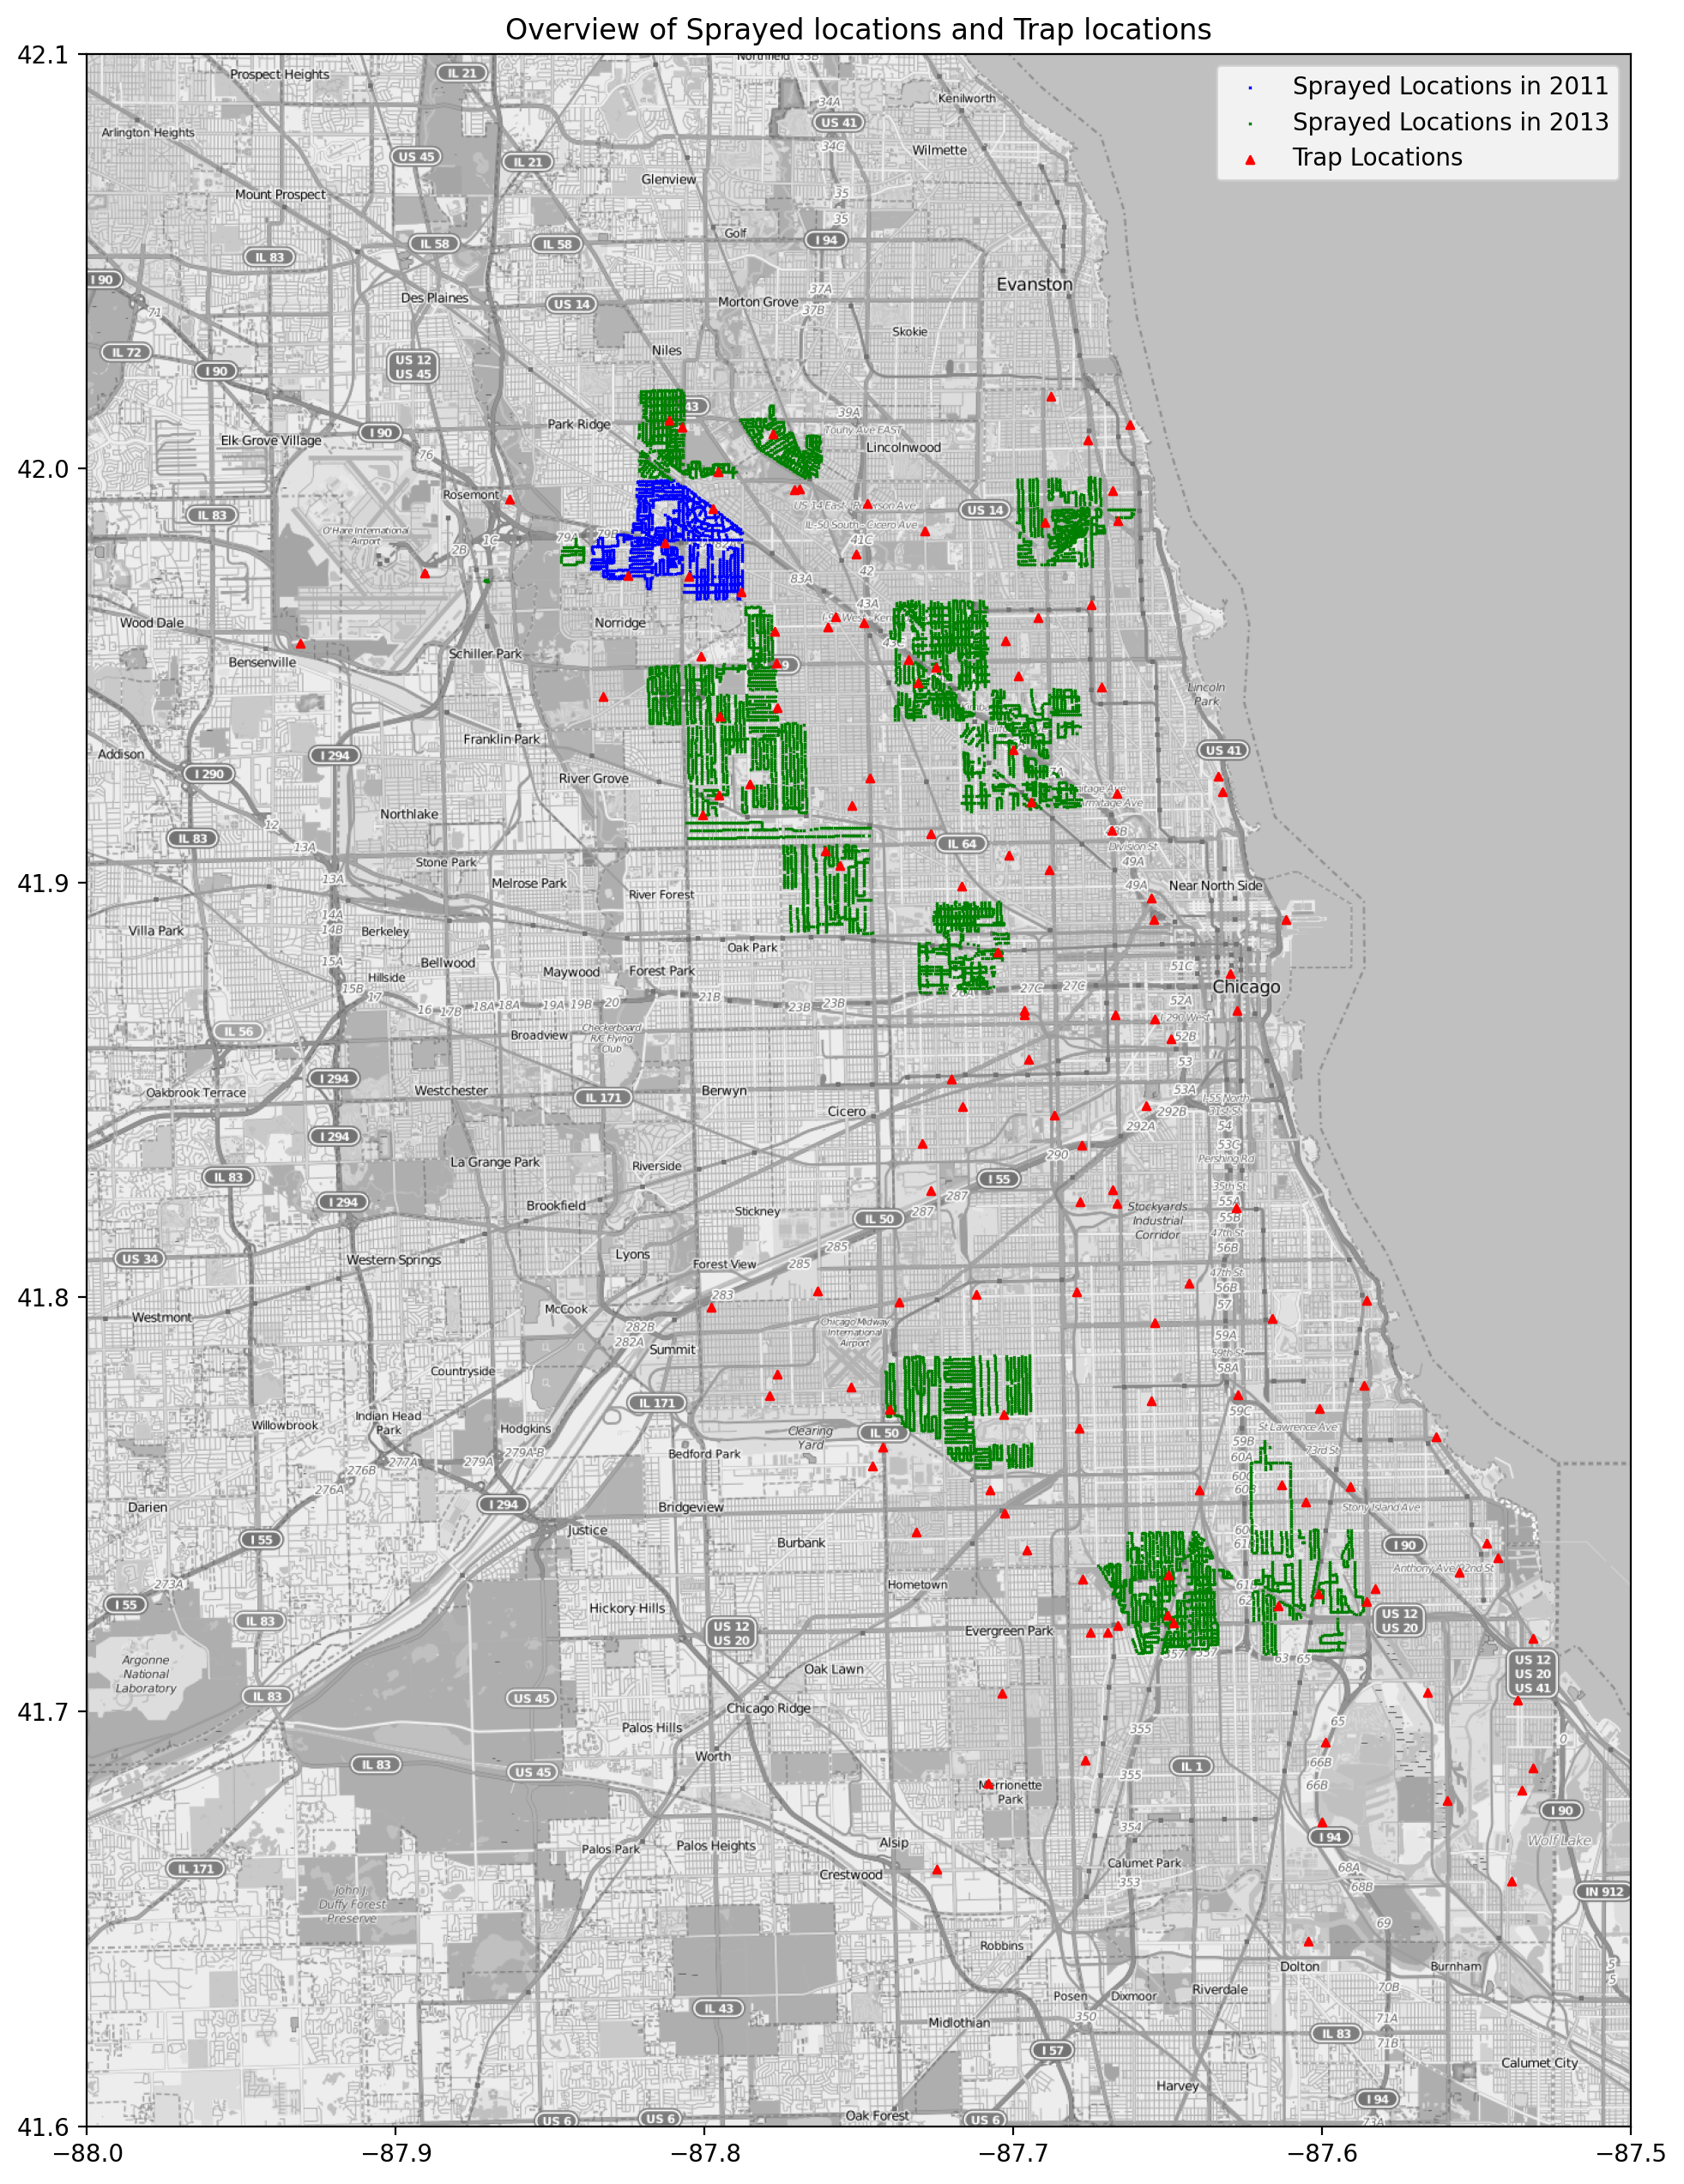

In [7]:
mapdata = np.loadtxt('../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt')

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(16,16), dpi=200 )
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
               aspect=aspect)

# Showing the 2011 spray locations
locations_2011 = spray_2011[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations_2011[:,0], locations_2011[:,1], marker='x', s= 0.2, c='blue', label='Sprayed Locations in 2011')

# Showing the 2013 spray locations
locations_2013 = spray_2013[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations_2013[:,0], locations_2013[:,1], marker='x', s= 0.2, c='green', label='Sprayed Locations in 2013')

# Juxtaposing on the trap locations
locations_traps = merged_train[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations_traps[:,0], locations_traps[:,1], marker='^', s= 10, c='red', label='Trap Locations')

plt.title('Overview of Sprayed locations and Trap locations')
plt.legend();


### Effectiveness of spraying on mosquitos

To evaluate the effectiveness of spraying on mosquitos, we looked at the monthly growth of the number of mosquitos per year.

In [49]:
# Creating a function to plot no. of mosquitos in a given year
def plot_all_nummos(df, year):
    import matplotlib.ticker as mticker
    df = df.loc[df['year'] == year]
    
    # Summing the number of mosquitos by the month
    new_df = pd.DataFrame(df.groupby(['month'])['nummosquitos'].sum())
    
    plt.rcParams["figure.figsize"] = (12,7) 
    plt.plot(new_df, label=year)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.grid(color = 'black', axis='y', linestyle = '-.', linewidth = 0.5)
    plt.title('Number of Mosquitos vs Month')
    plt.ylabel('Number of Mosquitos')
    plt.xlabel('Month')
    plt.legend();

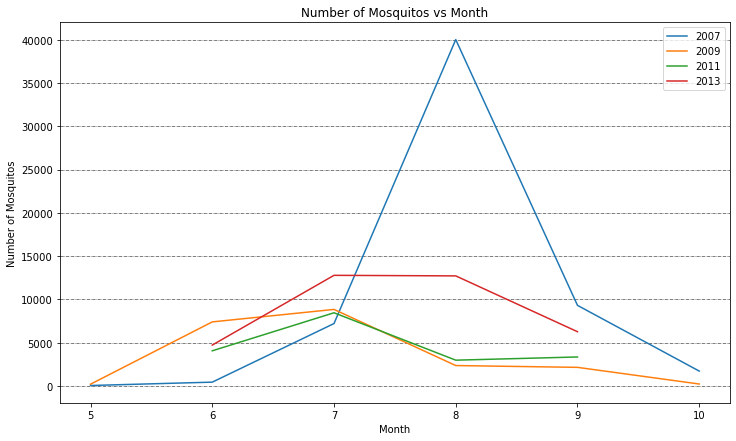

In [51]:
# Plotting the number of mosquitos per month for all 4 years in train dataset
years = [2007, 2009, 2011, 2013]

for year in years:
    plot_all_nummos(merged_train, year)

As seen in the graph above, the number of mosquitos usually peak at July and have a steady decrease towards the later months. This is in line with the summer months of June, July and August which provides the optimal breeding conditions for mosquitos.

There is an exception in year 2007 where there was a sudden and abnormal spike in August, however, there are insufficient information provided to explain the anomaly.

Furthermore, spray data was only provided for years 2011 and 2013. Hence, we will be mainly focuing on these 2 years. 

In 2011, there were 2 separate dates where spray data was provided, however, as one of the sprayed location was far away from any of the trap data provided, that particular date was discarded. 

#### Exploring 2011 Spray Data

In [10]:
spray_2011.describe()

latitude    longitude    year
count  2114.000000  2114.000000  2114.0
mean     41.983344   -87.805927  2011.0
std       0.006702     0.012738     0.0
min      41.968435   -87.836560  2011.0
25%      41.977943   -87.816806  2011.0
50%      41.985556   -87.803253  2011.0
75%      41.986460   -87.794225  2011.0
max      41.997028   -87.787710  2011.0

As 2011 had only 1 date which spray data was provided, we are able to narrow down the trap which alerted the city of Chicago to spray.

In [11]:
# Creating a mask for to identify any traps between the sprayed locations.
spray_loc_2011 = (
    (merged_train['latitude'] >= 41.968435) & 
    (merged_train['latitude'] <= 41.997028) & 
    (merged_train['longitude'] >= -87.836560) &
    (merged_train['longitude'] <= -87.787710) & 
    (merged_train['year'] == 2011)
)

traps_within_2011_spray = merged_train.loc[spray_loc_2011]

In [12]:
# Finding the trap which triggered the spray in 2011
traps_within_2011_spray.loc[traps_within_2011_spray['wnvpresent'] == 1]

date                 species   latitude  longitude  trap  \
3821 2011-08-12          CULEX RESTUANS  41.973845 -87.805059  T223   
4787 2011-08-26  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223   
6441 2011-09-01  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223   
7452 2011-09-23  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223   
8269 2011-07-29  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223   

      nummosquitos  wnvpresent  wnvcount  station  tmax  ...  ra  sn  sq  ts  \
3821           3.0         1.0       1.0        1    81  ...   0   0   0   0   
4787           5.0         1.0       1.0        1    83  ...   0   0   0   0   
6441          11.0         1.0       1.0        1    93  ...   0   0   0   0   
7452          24.0         1.0       1.0        1    62  ...   0   0   0   0   
8269          90.0         1.0       1.0        1    86  ...   0   0   0   0   

      tsra  vcts   gr  vcfg  sprayed  year  
3821     0     0  0.0   0.0        0  2011  
4787     0     0  0.0   0.0        0  2011  
6441     0     0  0.0   0.0        0  2011  
7452     0     0  0.0   0.0        0  2011  
8269     0     0  0.0   0.0        0  2011  

[5 rows x 44 columns]

Based on the criteria which was mentioned earlier, the hotspot is assumed to be identified on 2011-09-01 as it is the 2nd week where wnv is present in the trap. 

There also seemed to have a delay which a hotspot was identified as the spraying was peformed on 2011-09-07. This is reasonable as it takes time to activate the spraying procedure. 

In [13]:
# Creating a function to plot the number of mosquitos for the year for a particular trap
def plot_trap(trap_num, year_start, year_end):
    train_plot = merged_train.loc[(merged_train['trap'] == trap_num)]
    group_nummos = train_plot.groupby(train_plot['date'].dt.date)['nummosquitos'].sum()
    
    start = dt.datetime.strptime(year_start, '%Y').date()
    end = dt.datetime.strptime(year_end, '%Y').date()
    
    df = pd.DataFrame(group_nummos)
    sdf = (df.index > start) & (df.index < end)
    plt.figure(figsize=(12,9))
    plt.plot(df.loc[sdf])
    
    plt.grid(color = 'black', axis='y', linestyle = '-.', linewidth = 0.5)
    
    plt.title(f'No. of Mosquitos in 2011 (Trap: {trap_num})')
    plt.xlabel('No. of Mosquitos')
    plt.ylabel('Date');

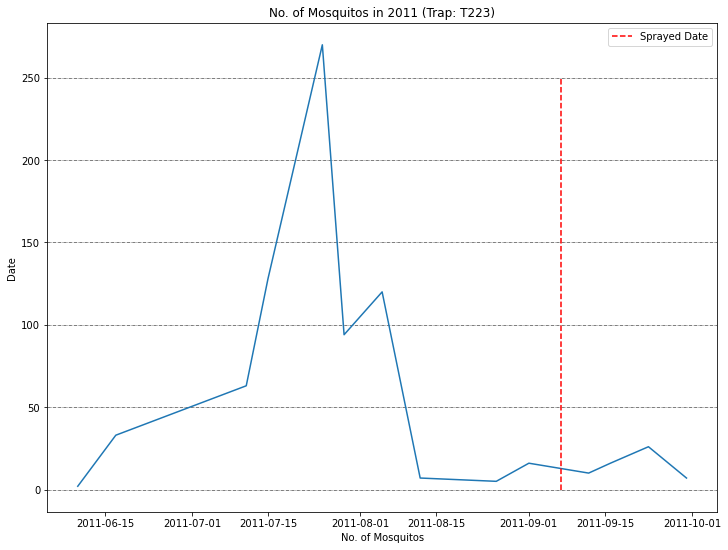

In [14]:
# Creating a plot for trap T223
plot_trap('T223', '2010', '2012')

# Adding a vertical line to indicate the date when the trap was sprayed.
plt.vlines(
x= dt.datetime.strptime('2011-09-07', '%Y-%m-%d').date(),
ymin=0,
ymax=250,
color='red',
linestyle='dashed',
label='Sprayed Date'
)

plt.legend();

While it seems that the spray for this trap only resulted in a minor dip in the overall number of mosquitos, the table below shows that the spray was effective in suppressing the mosquitos affected with WNV for at least 2 weeks.

In [56]:
# Checking on trap t223 after spraying on 2011-09-07
t223_trap = traps_within_2011_spray.loc[traps_within_2011_spray['date'] >= '2011-08-26']

t223_trap.set_index('date').sort_index()

species   latitude  longitude  trap  nummosquitos  \
date                                                                           
2011-08-26  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223           5.0   
2011-09-01          CULEX RESTUANS  41.973845 -87.805059  T223           1.0   
2011-09-01           CULEX PIPIENS  41.973845 -87.805059  T223           4.0   
2011-09-01  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223          11.0   
2011-09-12          CULEX RESTUANS  41.973845 -87.805059  T223           2.0   
2011-09-12  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223           8.0   
2011-09-16          CULEX RESTUANS  41.973845 -87.805059  T223           7.0   
2011-09-16  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223           9.0   
2011-09-23          CULEX RESTUANS  41.973845 -87.805059  T223           2.0   
2011-09-23  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223          24.0   
2011-09-30  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223           3.0   
2011-09-30          CULEX RESTUANS  41.973845 -87.805059  T223           4.0   

            wnvpresent  wnvcount  station  tmax  tmin  ...  ra  sn  sq  ts  \
date                                                   ...                   
2011-08-26         1.0       1.0        1    83    59  ...   0   0   0   0   
2011-09-01         0.0       0.0        1    93    71  ...   0   0   0   0   
2011-09-01         0.0       0.0        1    93    71  ...   0   0   0   0   
2011-09-01         1.0       1.0        1    93    71  ...   0   0   0   0   
2011-09-12         0.0       0.0        1    86    64  ...   0   0   0   0   
2011-09-12         0.0       0.0        1    86    64  ...   0   0   0   0   
2011-09-16         0.0       0.0        1    58    46  ...   0   0   0   0   
2011-09-16         0.0       0.0        1    58    46  ...   0   0   0   0   
2011-09-23         0.0       0.0        1    62    48  ...   0   0   0   0   
2011-09-23         1.0       1.0        1    62    48  ...   0   0   0   0   
2011-09-30         0.0       0.0        1    57    45  ...   1   0   0   0   
2011-09-30         0.0       0.0        1    57    45  ...   1   0   0   0   

            tsra vcts   gr  vcfg  sprayed  year  
date                                             
2011-08-26     0    0  0.0   0.0        0  2011  
2011-09-01     0    0  0.0   0.0        0  2011  
2011-09-01     0    0  0.0   0.0        0  2011  
2011-09-01     0    0  0.0   0.0        0  2011  
2011-09-12     0    0  0.0   0.0        0  2011  
2011-09-12     0    0  0.0   0.0        0  2011  
2011-09-16     0    0  0.0   0.0        0  2011  
2011-09-16     0    0  0.0   0.0        0  2011  
2011-09-23     0    0  0.0   0.0        0  2011  
2011-09-23     0    0  0.0   0.0        0  2011  
2011-09-30     0    0  0.0   0.0        0  2011  
2011-09-30     0    0  0.0   0.0        0  2011  

[12 rows x 43 columns]

For 2013, we will used previously identified traps which had been sprayed, we can then check on the growth of number of mosquitos for those traps.

In [16]:
# Creating a df for traps which were identified to be sprayed.
sprayed_loc = merged_train.loc[(merged_train['sprayed'] == 1)]
sprayed_loc

date                 species   latitude  longitude  trap  \
4797 2013-08-22           CULEX PIPIENS  41.728495 -87.600963  T227   
4906 2013-08-08           CULEX PIPIENS  41.932094 -87.700117  T147   
5951 2013-08-15           CULEX PIPIENS  41.916265 -87.800515  T151   
6345 2013-08-15  CULEX PIPIENS/RESTUANS  41.916265 -87.800515  T151   
6376 2013-08-29          CULEX RESTUANS  41.987280 -87.666066  T231   
6829 2013-08-15  CULEX PIPIENS/RESTUANS  41.904194 -87.756155  T230   
6987 2013-08-22          CULEX RESTUANS  41.728495 -87.600963  T227   
7375 2013-08-22  CULEX PIPIENS/RESTUANS  41.728495 -87.600963  T227   
7446 2013-07-25  CULEX PIPIENS/RESTUANS  41.951866 -87.725057  T228   
7870 2013-08-29  CULEX PIPIENS/RESTUANS  41.987280 -87.666066  T231   

      nummosquitos  wnvpresent  wnvcount  station  tmax  ...  ra  sn  sq  ts  \
4797           5.0         0.0       0.0        2    78  ...   1   0   0   0   
4906           5.0         0.0       0.0        2    79  ...   0   0   0   0   
5951           9.0         1.0       1.0        2    74  ...   0   0   0   0   
6345          11.0         0.0       0.0        2    74  ...   0   0   0   0   
6376          11.0         0.0       0.0        2    87  ...   0   0   0   0   
6829          15.0         1.0       1.0        2    74  ...   0   0   0   0   
6987          16.0         0.0       0.0        2    78  ...   1   0   0   0   
7375          22.0         1.0       1.0        2    78  ...   1   0   0   0   
7446          24.0         0.0       0.0        2    81  ...   0   0   0   0   
7870          39.0         1.0       1.0        2    87  ...   0   0   0   0   

      tsra  vcts   gr  vcfg  sprayed  year  
4797     0     0  0.0   0.0        1  2013  
4906     0     0  0.0   0.0        1  2013  
5951     0     0  0.0   0.0        1  2013  
6345     0     0  0.0   0.0        1  2013  
6376     0     0  0.0   0.0        1  2013  
6829     0     0  0.0   0.0        1  2013  
6987     0     0  0.0   0.0        1  2013  
7375     0     0  0.0   0.0        1  2013  
7446     0     0  0.0   0.0        1  2013  
7870     0     0  0.0   0.0        1  2013  

[10 rows x 44 columns]

It is interesting to note that of the sprayed locations, only 10 locations were identified to have been sprayed. This is due to the fact that there is an activation delay for spraying. It means that they were most likely to have been previously singled out as hotspots by the city of Chicago.

These 10 locations were identified to have been sprayed on the date which the trap data was extracted. They will still be able to show if spraying was effective in controlling the mosquito population.

In [17]:
# Getting the unique trap number.
sprayed_loc['trap'].value_counts()

T227    3
T151    2
T231    2
T147    1
T230    1
T228    1
Name: trap, dtype: int64

In [18]:
# Creating a function to plot the growth of the mosquitos for a particular trap.
def plot_sprayed_effect(trap_num):
    train_plot = merged_train.loc[(merged_train['trap'] == trap_num)]
    group_nummos = train_plot.groupby(train_plot['date'].dt.date)['nummosquitos'].sum()
    
    start = dt.datetime.strptime('2013-01-01', '%Y-%m-%d').date()
    end = dt.datetime.strptime('2013-12-31', '%Y-%m-%d').date()
    
    df = pd.DataFrame(group_nummos)
    sdf = (df.index > start) & (df.index < end)
    plt.figure(figsize=(12,7))
    plt.plot(df.loc[sdf])

    plt.vlines(
    x=sprayed_loc.loc[sprayed_loc['trap'] == trap_num]['date'],
    ymin=0,
    ymax=df['nummosquitos'].max(),
    color='red',
    linestyle='dashed',
    label='Sprayed Date'
    )

    plt.grid(color = 'black', axis='y', linestyle = '-.', linewidth = 0.5)
    
    plt.title(f'No. of Mosquitos in 2013 (Trap: {trap_num})')
    plt.xlabel('No. of Mosquitos')
    plt.ylabel('Date')
    plt.legend();

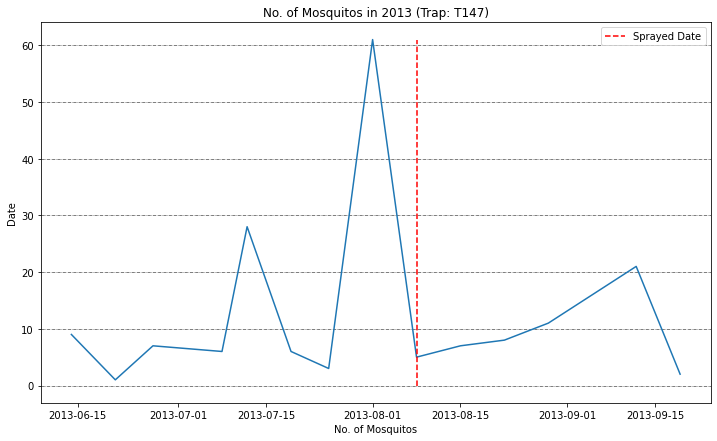

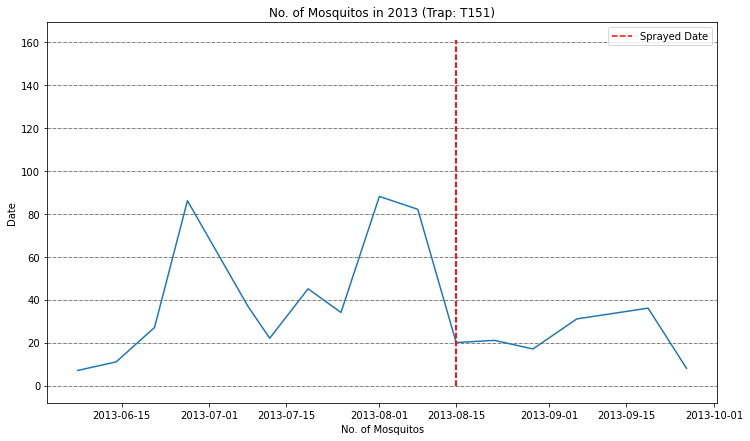

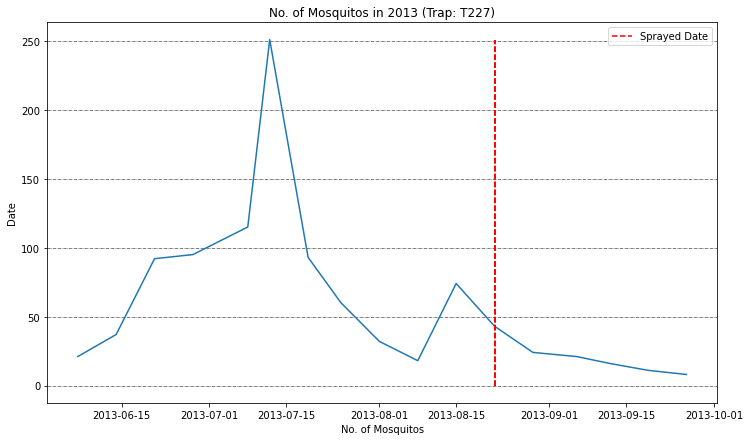

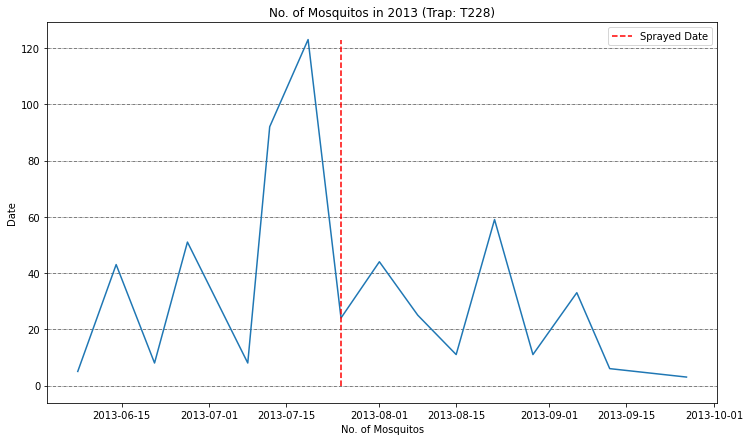

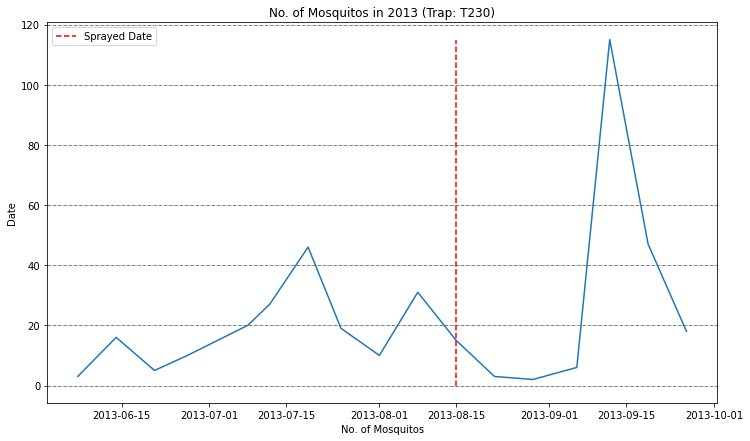

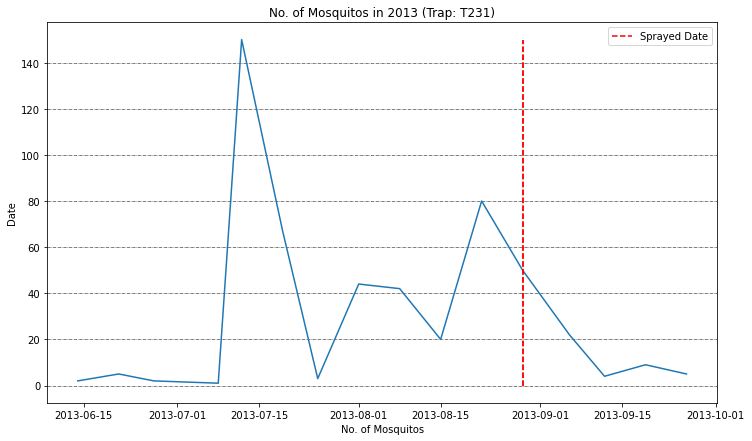

In [19]:
# Plotting for all the traps identified earlier
traps = ['T147', 'T151', 'T227', 'T228', 'T230', 'T231']

for trap in traps:
    plot_sprayed_effect(trap)

Based on the graphs above, most of the traps did indeed have an immediate effect in reduction of mosquito population. The mosquito population also started to plateau after spraying. Futhermore, it can also be seen that apart from 1 trap (T230), other traps did not have a higher peak in mosquito population than before spraying. 

This shows that traps are effective in reducing the mosquito population in the short-run but the effect in the long-run is inconclusive.

One caveat would be that the the sprays were done mostly after mid-august where it is a natural reduction in mosquito population due to seasonality which was mentioned above.

### Cost of Spraying

The cost of spraying is at 67¢ / acre. [Source](https://www.centralmosquitocontrol.com/-/media/files/centralmosquitocontrol-na/us/resources-lit%20files/zenivex%20cost%20comparison%20fact%20sheet.pdf) 

However, we can calculate the estimated average area that was sprayed per session.

In [20]:
# Getting the area of each spraying session.
spray_max_latlong = spray.groupby('date')[['latitude', 'longitude']].max()
spray_min_latlong = spray.groupby('date')[['latitude', 'longitude']].min()
spray_diff_latlong = spray_max_latlong - spray_min_latlong
spray_diff_latlong['area'] = (spray_diff_latlong['latitude'] * spray_diff_latlong['longitude'] * (100 ** 2))
spray_diff_latlong

latitude  longitude        area
date                                       
2011-09-07  0.028593   0.048850   13.967925
2013-07-17  0.301000   0.241668  727.421683
2013-07-25  0.028788   0.031853    9.170044
2013-08-08  0.029477   0.038787   11.433016
2013-08-15  0.078707   0.072783   57.285336
2013-08-16  0.053337   0.039117   20.863526
2013-08-22  0.181550   0.143928  261.301889
2013-08-29  0.238997   0.080430  192.225019
2013-09-05  0.042133   0.056527   23.816569

Some of the area are too large. Further analysis showed that it is due to those dates having multiple separate locations which will skew the calculated area.

In [65]:
# Removing the skewed area from the df
spray_area = spray_diff_latlong.loc[spray_diff_latlong['area'] < 20]

In [66]:
# Converting the average area from SquareKM to Acres
acres = spray_area['area'].mean() * 247
acres

2846.344467792198

In [67]:
# Calculating price per session for Zenivex
acres * 0.67

1907.0507934207728

The cost of renting a ULV fogging truck is between \\$6,350 to \\$15,840. [Source](http://www.gfmosquito.com/wp-content/uploads/2013/06/2013-North-Dakota-Bid-Tabulation.pdf)

In [24]:
# Taking an average of renting the truck
(6350 + 15840)/2

11095.0

The cost of Zenivex is estimated to be \\$1907.05 and average cost of renting ULV fogging truck is \\$11,095.

Hence the cost of spray per session is estimated to be \\$13,002.05. (This cost does not include labour and other overhead costs)

### Cost of medical expenses

Given the data from Sacramento, California in 2005. The West Nile Virus infection is separated into 2 severities, West Nile Fever (WNF) and West Nile neuroinvasive disease (WNND).

It was reported that there were a total of 163 reported cases of West Nile Virus and that the total medical cost associated is approximately \\$2.28 million. [Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/)

However, the of total 163 cases, 117(71.8\%) was diagonsed as the less severe WNF, while 46(28.2\%) was diagonsed as the more severe WNND. As such, the medical cost associated is also very different. The total medical cost of WNND is \\$2.14 million and the total medical cost of WNF is \\$19,39. The average medical cost of WNND and WNF is approximately \\$46,000 and \\$167 respectively.

Using the last year which the city of Chicago did not implement any mosquito control measure (2002), the number of infections is 225. Taking away the number of infections in 2013, the estimated number of infections without mosquito control measure is at 188. [Source](https://www.chicago.gov/content/dam/city/depts/cdph/food_env/general/West_Nile_Virus/WNV_2018databrief_FINALJan102019.pdf)

Based on the same ratio of severity, the expected cost of medical expense if there are no mosquito control measure would be approximately \\$2.46 million.

However, Chicago's mosquito control measures comprises larvicide as well as spraying. Hence, assuming an equal weightage to both mosquito controls. Spraying will only alleviate half of the expected medical expense.

### Predicted WNV probability

<img src="../Pictures/XGBoost_Confusion_Matrix.png" style='float:left'>

Assuming that this the predicted data for a year, we will proceed to calculate the infection rate and spraying rate in order to predict the cost of spraying and medical expenses.

In [25]:
# Finding the sum of wnvpresent for each year
merged_train.groupby('year')['wnvpresent'].sum()

year
2007    189.0
2009     19.0
2011     50.0
2013    199.0
Name: wnvpresent, dtype: float64

The number of cases per year is extracted from [here](https://www.chicago.gov/content/dam/city/depts/cdph/food_env/general/West_Nile_Virus/WNV_2018databrief_FINALJan102019.pdf).

In [26]:
# Creating a dictionary to calculate the infection rate and spraying rate
wnv_infection = {
    2007: {'wnv_present': 189, 'num_cases': 10, 'num_spray':np.nan},
    2009: {'wnv_present': 19, 'num_cases': 1, 'num_spray':np.nan},
    2011: {'wnv_present': 50, 'num_cases': 8, 'num_spray':2},
    2013: {'wnv_present': 199, 'num_cases': 37, 'num_spray':8},
}

# Converting dictionary to df
wnv_infection_df = pd.DataFrame(wnv_infection).T

- Infection rate is calculated by how many reported cases over the total number of wnv present.
- Spray rate is calculated by how many of sprays Chicago performed over the total number of wnv present.

In [27]:
# Calculating infection rate and spray rate.
wnv_infection_df['infection_rate'] = wnv_infection_df['num_cases']/wnv_infection_df['wnv_present']
wnv_infection_df['spray_rate'] = wnv_infection_df['num_spray']/wnv_infection_df['wnv_present']

In [28]:
wnv_infection_df

wnv_present  num_cases  num_spray  infection_rate  spray_rate
2007        189.0       10.0        NaN        0.052910         NaN
2009         19.0        1.0        NaN        0.052632         NaN
2011         50.0        8.0        2.0        0.160000    0.040000
2013        199.0       37.0        8.0        0.185930    0.040201

In [29]:
# Getting the average infection rate
avg_infection_rate = wnv_infection_df['infection_rate'].mean()
avg_infection_rate

0.11286782002465684

$$
\text{Average Infection Rate} = \frac{\text{Number of Infected Cases}}{\text{Sum of WnvPresent}} \\
                           = 11.29\%
$$

In [57]:
# Getting the average spraying rate
avg_spray_rate = wnv_infection_df['spray_rate'].mean()
avg_spray_rate

0.040100502512562815

$$
\text{Average Spray Rate} = \frac{\text{Number of Spray}}{\text{Sum of WnvPresent}} \\
                           = 4\%
$$

#### Overall Cost

There are 3 options available:
1) Spraying for all predicted wnv present

2) Spraying with the average spraying rate

3) No spraying at all.

In [ ]:
# Creating a function to calculate the medical costs
def medical_cost(wnv_present):
    infected = wnv_present * avg_infection_rate
    return round((infected * .718 * 167) + (infected * .282 * 46000),2)

#### Option 1: Spraying for all predicted wnv present

In [74]:
# Only 22 wnv_present as it was not predicted
medical_cost(17)

25120.13

In [75]:
# Price of spraying
(664 + 97) * 13002.05

9894560.049999999

If we decided to spray for all predicted WnvPresent, we will have to spray 761 (664 + 97) times. This will incur a cost of \\$9,894,560.05 for spraying. However, the expected medical cost will only be \\$25,120.13.

The overall cost is expected to be \\$9,919,680.18.

#### Option 2: Spraying at average spray rate

In [76]:
# Calculating the number of spraying session based on average_spray_rate
761 * avg_spray_rate

30.516482412060302

In [78]:
# Calculating the number of wnv_present without being sprayed.
estimated_wnv_left = ((1-avg_spray_rate) * 97) + 17

In [79]:
# Calculating the number of wnv_present without being sprayed.
medical_cost(estimated_wnv_left)

162704.95

In [77]:
# Calculating cost of spraying for 26 times.
31 * 13002.05

403063.55

If we followed the average spraying rate, we will have to spray approximately 31 times. This will incur a spraying cost of \\$403,063.55. However, this will increase the number of wnv cases, and medical cost was increased to $162,705.95.

The overall cost is expected to be $565,768.5.

#### Option 3: No Spraying at all.

In [80]:
# Calculating medical cost for all wnv present
medical_cost(17+97)

168452.66

If we do not spray at all, only medical cost would be incurred. The medical cost incurred is $168,452.66.

|Options|1: Spray All WNV|2: Spray with Average Rate|3: No Spraying|
|---|---|---|---|
|Spraying Cost|\\$9,894,560.05|\\$403,063.55|\\$0|
|Medical Cost|\\$25,120.13|\\$162,705.95|\\$168,452.66|
|Total expected Cost|\\$9,919,680.18|\\$565,768.5|\\$168,452.66|

## Conclusion and Recommendations for Spraying

Although the expected cost of not spraying is the lowest amongst the three options. This is only looking at the monetary costs of the west nile virus infection. There are other intangible costs and benefits which we are unable to calculate, such as fatalities, discomfort of infected patients, productivity losses for infected patients.

Hence, it is not beneficial to choose to not spray.

Our recommendation currently would be to choose option 2 to spray at the average rate.

However, as the spray data consist of only 2 years worth of data, more data would be required to give a more concrete recommendation. The spray data also does not show a strong reduction of west nile virus infection cases.

Furthermore, spraying should also be coupled with other mosquito control measures such as educating the public on clearing any potential mosquito breeding ares in their own household.

### Future area of work

Most of the spray data is clustered around and after mid-August which coincides with the natural seasonal decline of mosquito population. 

The criteria to conduct spraying should also be scaled according to be months. Spraying criteria should be more encompassing during the start of summer, for example, having 1 week of wnv present with high number of mosquitos should trigger the spraying.

We have also identified that week 29 and 30 seems to have a surge of wnv present mosquitos. We can have a pre-emptive spraying to reduce the mosquito population.

Another area of work would be to reduce the activation delay for spraying. The approximately 1 week delay in activating the spray may result in more infections than necessary.